In [1]:
import tensorflow as tf
import os

In [4]:
os.path.join('data','happy')

'data\\happy'

2  Remove dodgy images

In [38]:
import cv2
import imghdr

In [6]:
data_dir='data'

In [7]:
image_exts=['jpg','jpeg','png','bmp']

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)
            

3. Load data

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 180 files belonging to 2 classes.


In [4]:
data_iterator=data.as_numpy_iterator()

In [5]:
batch=data_iterator.next()

In [6]:
# len(batch)
batch[1]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

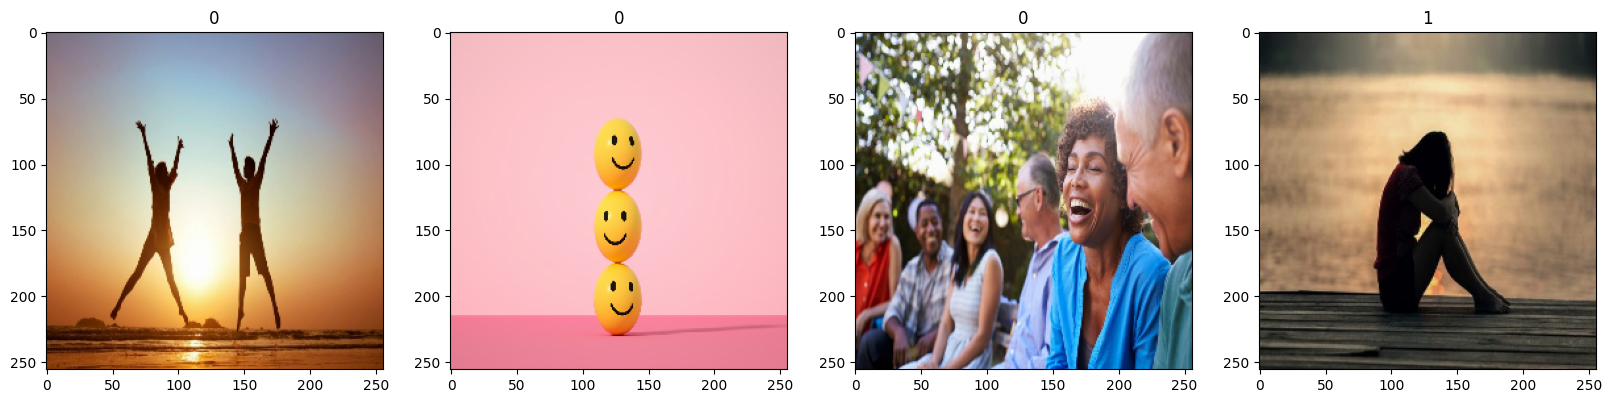

In [7]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale data

In [8]:
data=data.map(lambda x,y: (x/255, y))

In [9]:
batch=data.as_numpy_iterator().next()

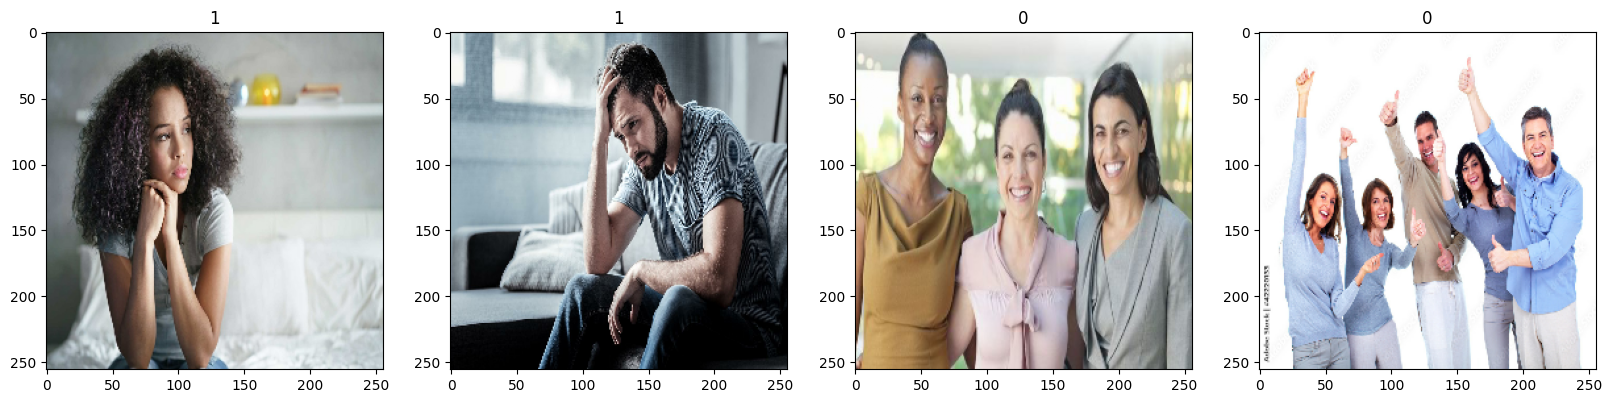

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [11]:
len(data)

6

In [12]:
train_size=int(len(data)*.6)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [13]:
train_size+test_size+val_size

6

In [14]:
train=data.skip(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

3. Build model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# from keras import callbacks

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

3.2 Training model

In [21]:
logdir='logs'

In [23]:
tensoboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensoboard_callback])

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 1.6453 - accuracy: 0.5000 - val_loss: 1.1223 - val_accuracy: 0.5156
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.9639 - accuracy: 0.4524 - val_loss: 0.6020 - val_accuracy: 0.6094
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6669 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.6044 - accuracy: 0.7262 - val_loss: 0.5900 - val_accuracy: 0.7188
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.5599 - accuracy: 0.7381 - val_loss: 0.5713 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.5976 - accuracy: 0.5714 - val_loss: 0.5670 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.5368 - accuracy: 0.7619 - val_loss: 0.5331 - val_accuracy: 0.8281
Epoch 8/20
3/3 [=========================

In [26]:
hist.history

{'loss': [1.6453173160552979,
  0.9638840556144714,
  0.6949335932731628,
  0.6044022440910339,
  0.5599491596221924,
  0.597568690776825,
  0.5367629528045654,
  0.49951788783073425,
  0.479391872882843,
  0.5065017938613892,
  0.3918731212615967,
  0.36674222350120544,
  0.2577512860298157,
  0.23148810863494873,
  0.17801454663276672,
  0.1597204953432083,
  0.197830930352211,
  0.25451332330703735,
  0.1637761890888214,
  0.18647445738315582],
 'accuracy': [0.5,
  0.4523809552192688,
  0.5,
  0.726190447807312,
  0.738095223903656,
  0.5714285969734192,
  0.761904776096344,
  0.8214285969734192,
  0.761904776096344,
  0.8214285969734192,
  0.8452380895614624,
  0.8690476417541504,
  0.9166666865348816,
  0.9642857313156128,
  0.9285714030265808,
  0.9404761791229248,
  0.9047619104385376,
  0.9047619104385376,
  0.9285714030265808,
  0.9642857313156128],
 'val_loss': [1.1223037242889404,
  0.6019660234451294,
  0.6668908596038818,
  0.5899975299835205,
  0.5713171362876892,
  0.566

3.3 Plot performance

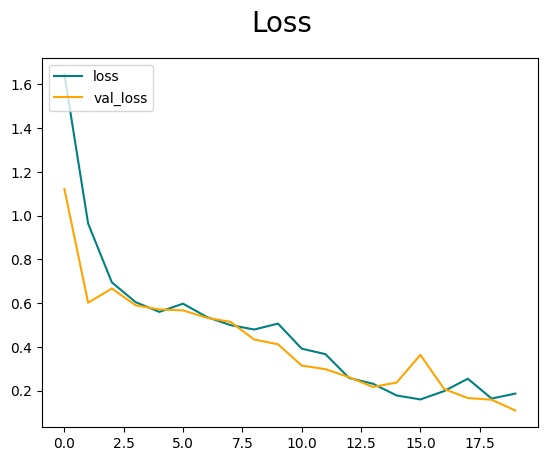

In [27]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

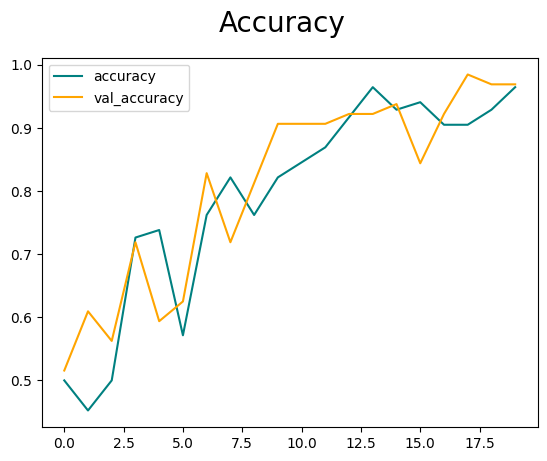

In [28]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate performance

4.1 Evaluate

In [31]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [30]:
len(test)

1

In [33]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 [==============================] - 0s 271ms/step


In [36]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 0.9090909361839294, Accuracy: 0.949999988079071


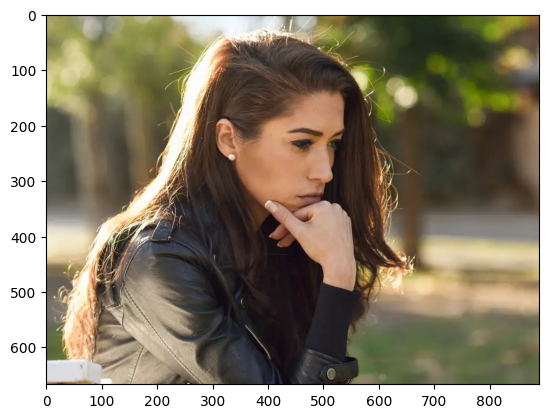

In [88]:
img=cv2.imread('sbandi.webp')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

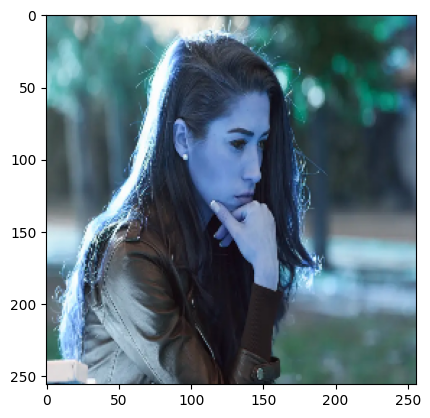

In [89]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 84ms/step


In [91]:
yhat

array([[0.34038243]], dtype=float32)

In [92]:
if yhat>0.5:
    print("predicted class is sad")
else:
    print("predicted class is happy")

predicted class is happy


5. Save the model

In [93]:
from keras.models import load_model

In [94]:
model.save(os.path.join('models','faceclassifermodel.h5'))

c:\Users\amey\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
new_model=load_model(os.path.join('models','faceclassifermodel.h5'))

In [97]:
new_model

In [100]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 39ms/step


In [101]:
if yhat_new>0.5:
    print("predicted class is sad")
else:
    print("predicted class is happy")

predicted class is happy
